Imports

In [0]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

Carregando o dataset

In [0]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


Exploração dos dados

In [11]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

Exibição dos dados

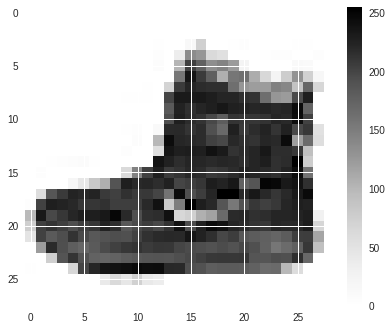

In [12]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as imagens

In [0]:
imagens_treino = imagens_treino/float(255)

Criando, compilando, treinando e normalizando o modelo

In [24]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

adam = keras.optimizers.Adam(lr=0.002)

'''lr
learning rate
taxa de aprendizado'''

parando_cedo = [keras.callbacks.EarlyStopping(monitor='val_loss'),
                keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',
                                               monitor='val_loss', save_best_only=True)]

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, 
                       batch_size = 480,
                       epochs=5, validation_split=0.2,
                       callbacks=parando_cedo)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 60us/step - loss: 0.6426 - acc: 0.7757 - val_loss: 0.4523 - val_acc: 0.8387
Epoch 2/5
48000/48000 [==============================] - 2s 40us/step - loss: 0.4276 - acc: 0.8485 - val_loss: 0.3967 - val_acc: 0.8597
Epoch 3/5
48000/48000 [==============================] - 2s 40us/step - loss: 0.3864 - acc: 0.8630 - val_loss: 0.3775 - val_acc: 0.8618
Epoch 4/5
48000/48000 [==============================] - 2s 40us/step - loss: 0.3603 - acc: 0.8719 - val_loss: 0.3512 - val_acc: 0.8747
Epoch 5/5
48000/48000 [==============================] - 2s 41us/step - loss: 0.3418 - acc: 0.8760 - val_loss: 0.3430 - val_acc: 0.8802


Sumário do modelo

In [15]:
sumario_do_modelo = modelo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Pesos da primeira camada Dense

In [16]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 6.1770529e-04, -5.7177022e-03,  4.9233064e-03, ...,
        -3.4757730e-02, -2.9884566e-02, -5.8418039e-02],
       [-7.0627712e-02, -3.2129511e-03,  6.4527035e-02, ...,
         7.3822394e-02,  7.4995592e-02, -5.1243432e-02],
       [ 1.2629986e-02, -7.5908080e-02, -2.6841402e+00, ...,
        -4.8490271e-02,  6.2874153e-02,  2.5197577e+00],
       ...,
       [ 1.0123365e-02, -3.8167909e-02, -2.8177865e+00, ...,
        -2.8139663e+00, -2.6680083e+00,  2.6510463e+00],
       [ 1.5732393e-02, -2.7290877e-02, -1.0481872e-02, ...,
        -1.5448462e-02,  1.1646114e-02,  2.9921636e-02],
       [-2.4638295e-02,  2.6490360e-02,  6.6962734e-02, ...,
         2.7110979e-02, -4.3123923e-02,  2.5531299e-02]], dtype=float32)

In [17]:
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))

pesos_camada_dense_aleatorios = np.random.rand(784, 256)

'''
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense]
)
'''

modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense]
)

modelo.layers[1].get_weights()


NameError: ignored

In [0]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

In [0]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


In [0]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

In [25]:
modelo.get_config()

{'layers': [{'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten_6',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros',
     'config': {'dtype': 'float32'}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'dtype': 'float32', 'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_12',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_6',
    'noise_shape': None,
    'rate': 0.2,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'softmax',
    'activity_regularizer': None,
   

In [0]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [0]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

In [0]:
vieses_camada_dense_zerados = np.zeros((256,))
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados]
)

Salvando e carregando o modelo treinado

In [0]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Visualizando as acurácias de treino e validação por época

In [0]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


Visualizando as perdas de treino e validação por época

In [0]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [0]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

Avaliando o modelo

In [0]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)